## HOMEWORK: PROJECT OF STATISTICAL ANALYSIS FOR TABULAR DATA

### 1. Metadata  
- age (numeric): Age of the client.
- job (categorical): Type of job (e.g., admin., technician, etc.).
- marital (categorical): Marital status (e.g., married, single, divorced).
- education (categorical): Education level (e.g., secondary, tertiary, etc.).
- default (categorical): Has credit in default? (yes/no).
- balance (numeric): Average yearly balance, in euros.
- housing (categorical): Has a housing loan? (yes/no).
- loan (categorical): Has a personal loan? (yes/no).
- contact (categorical): Contact communication type (e.g., cellular, telephone).
- day (numeric): Last contact day of the month.
- month (categorical): Last contact month of year.
- duration (numeric): Last contact duration, in seconds.
- campaign (numeric): Number of contacts performed during this campaign.
- pdays (numeric): Number of days that passed by after the client was last contacted.
- previous (numeric): Number of contacts performed before this campaign.
- poutcome (categorical): Outcome of the previous marketing campaign.
- y (categorical): Has the client subscribed to a term deposit? (yes/no).

In [48]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [80]:
# Define the column names as a list
column_names = ['age', 'job', 'marital', 'education', 'default', 'balance', 
                'housing', 'loan', 'contact', 'day', 'month', 
                'duration', 'campaign', 'pdays', 'previous','poutcome','y']

### 2. Load Dataset

In [83]:
dataset = pd.read_csv("data/bank-full.csv", names = column_names, sep = ";", skipinitialspace=True)
dataset.head()

C:\Users\tranh\AppData\Local\Temp\ipykernel_21568\3366831049.py:1: DtypeWarning: Columns (0,5,9,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("data/bank-full.csv", names = column_names, sep = ";", skipinitialspace=True)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no


In [84]:
# print important information about dataset
print("#Total of samples = ", dataset.shape[0])
print("#Features = ", dataset.shape[1])

#Total of samples =  45212
#Features =  17


In [88]:
# checking the missing values
dataset[dataset.eq("?").any(axis=1)].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


Filtering missing values

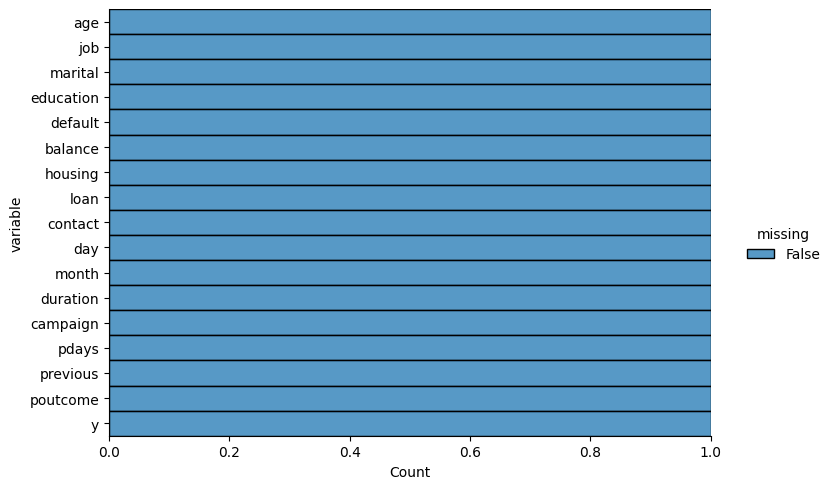

In [90]:
# plot missing data
sbn.displot(
    data = dataset.isna().melt(value_name="missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.5
)

plt.show()

In [91]:
dataset = dataset.dropna()
print("#Total samples without missing values = ", len(dataset))

#Total samples without missing values =  45212


### 3. Descriptive Statistical Analysis

* Numerical variables

In [104]:
# list of numerical variables 
numerical_cols = ["age", "balance","day", "duration", "campaign", "pdays","previous"]
for column in numerical_cols:
    dataset[column] = pd.to_numeric(dataset[column], errors='coerce')  # Convert and handle invalid values

Histogram

In [106]:
# function to plot distribution for 1 numerical column
def plot_all_numerical_histograms(dataframe):
    for column in numerical_cols:
        plt.figure(figsize=(14, 6))

        # Frequency chart (left)
        plt.subplot(1, 2, 1)
        sbn.histplot(dataframe[column], kde=False, bins=30)
        plt.title(f"Histogram of Frequencies for {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")

        # Density chart (right)
        plt.subplot(1, 2, 2)
        sbn.histplot(dataframe[column], kde=True, stat="density", bins=30)
        plt.title(f"Histogram of Densities for {column}")
        plt.xlabel(column)
        plt.ylabel("Density")

        # Display charts
        plt.tight_layout()
        plt.show()

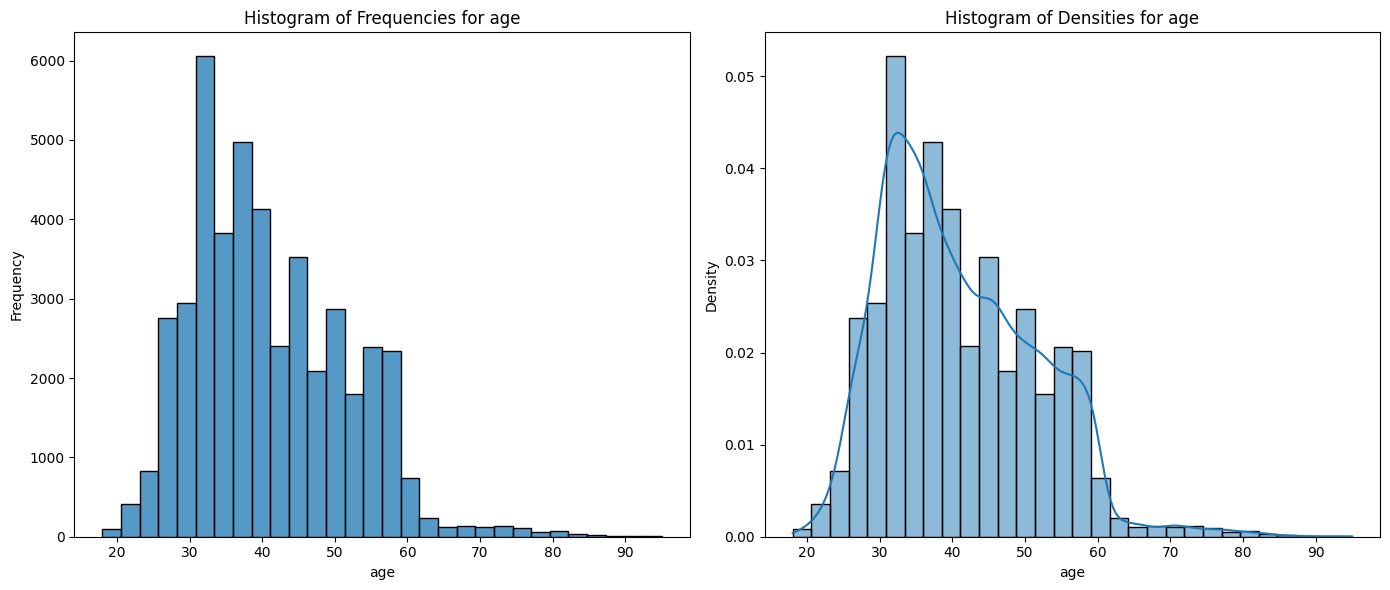

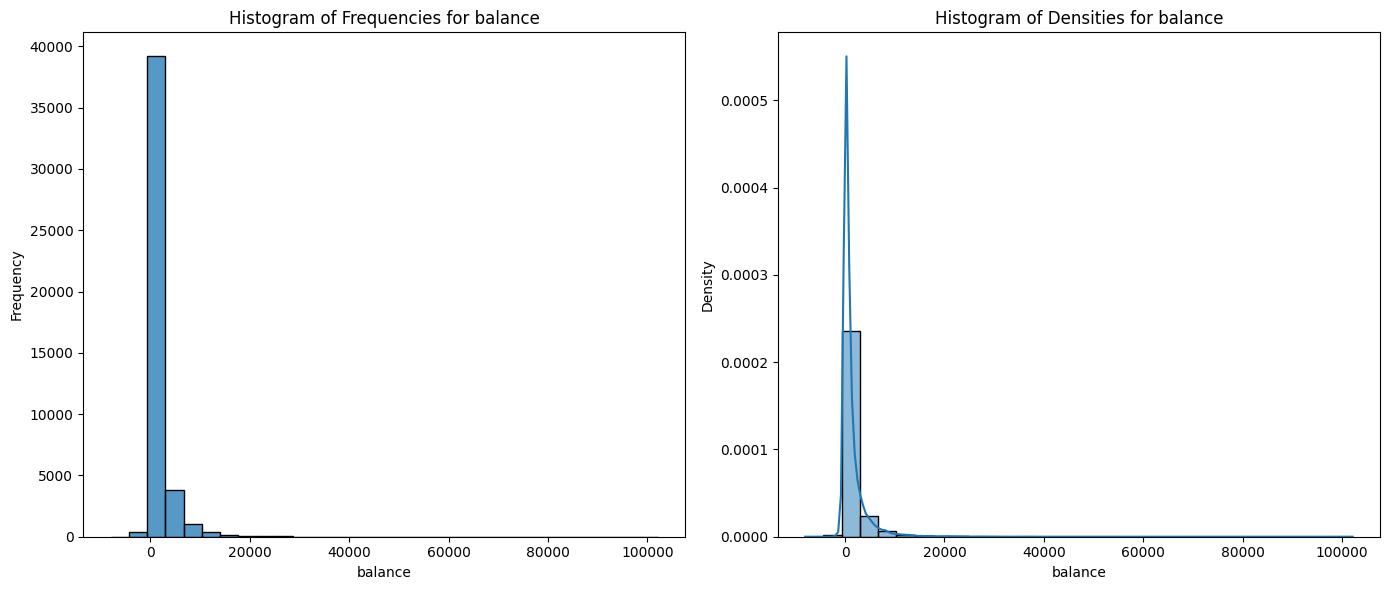

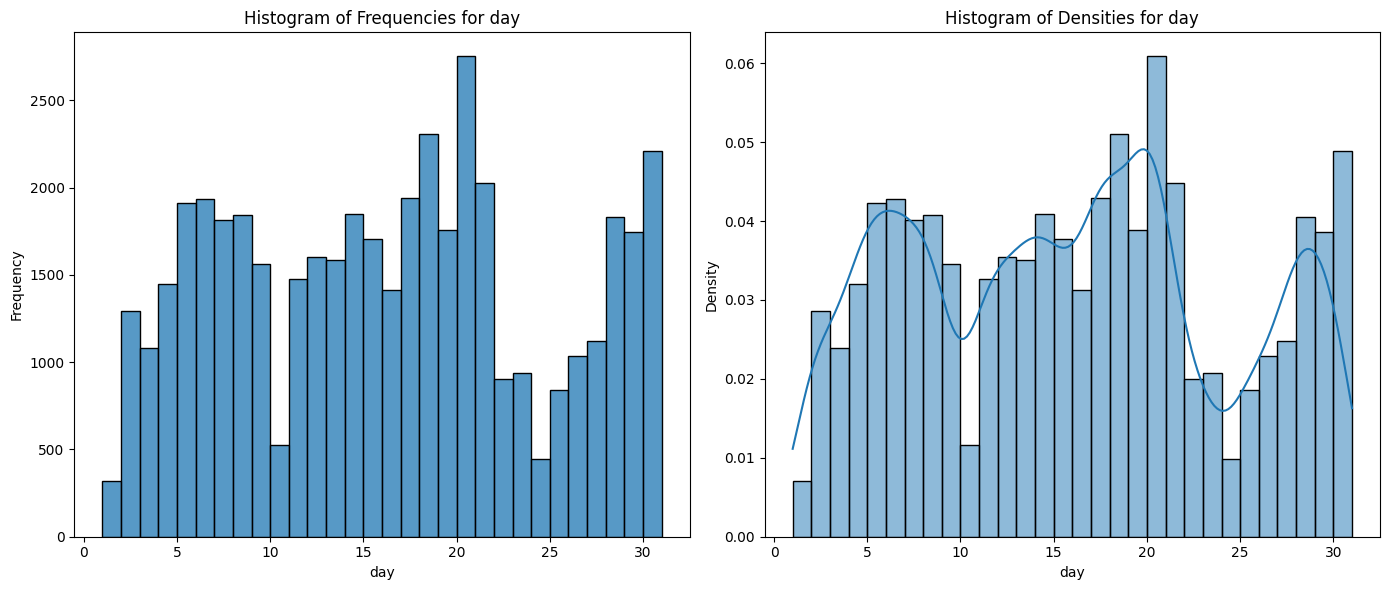

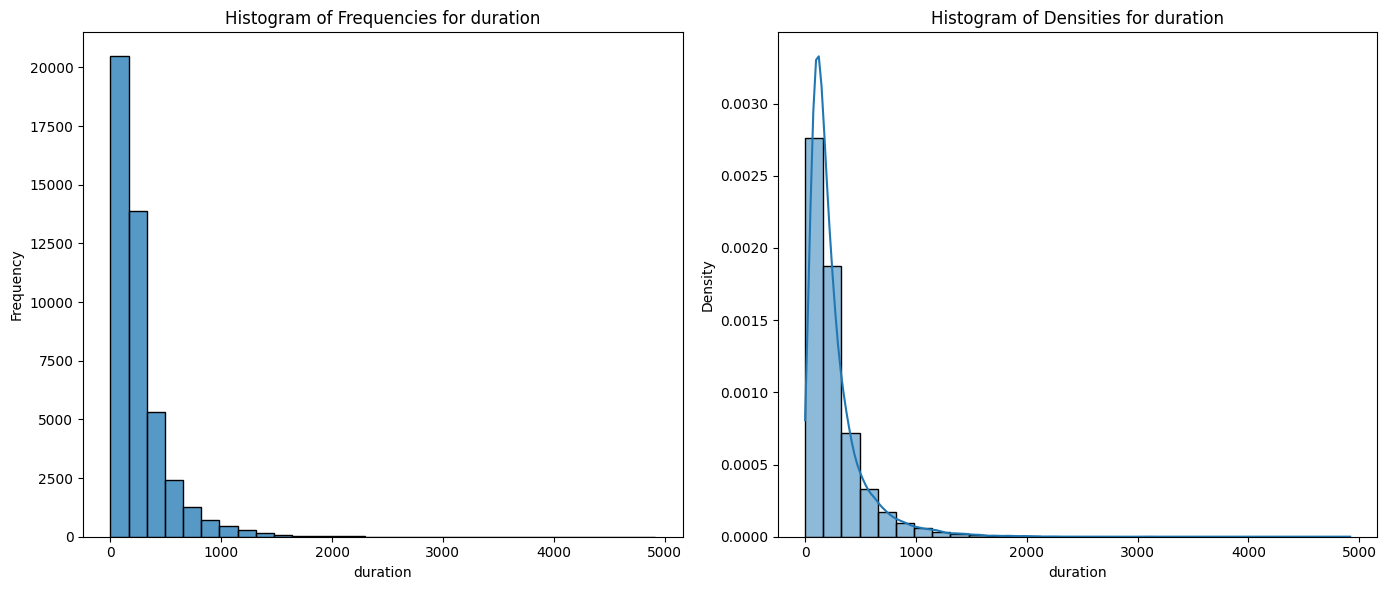

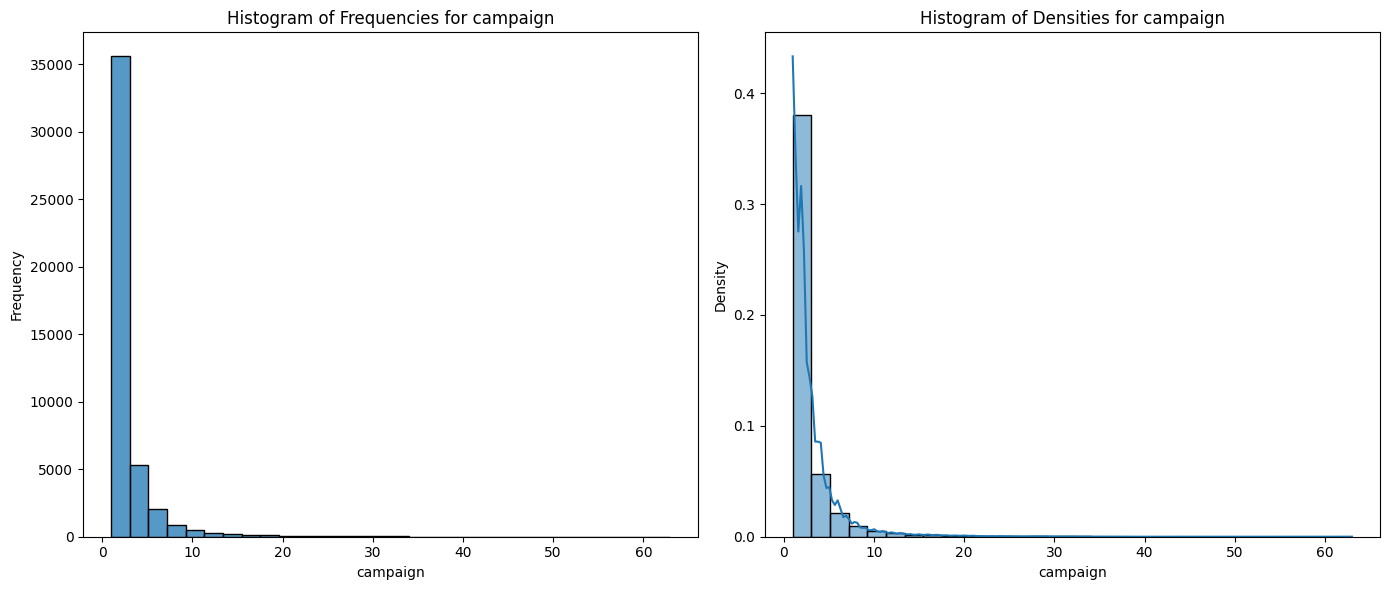

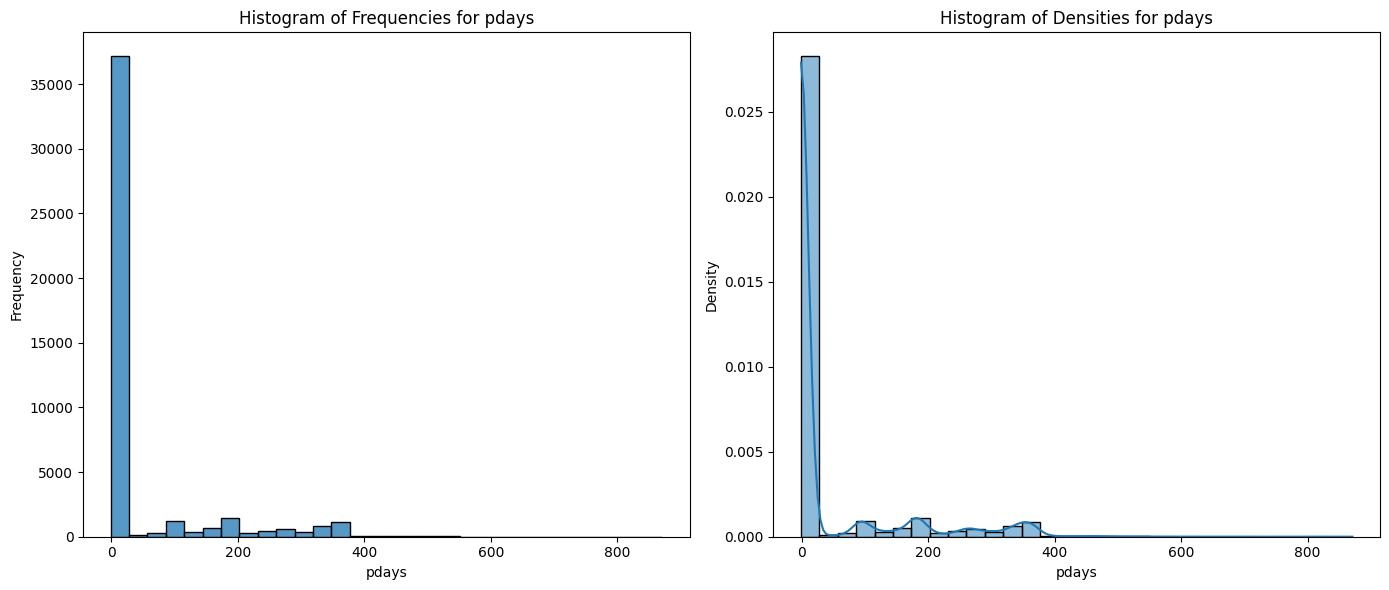

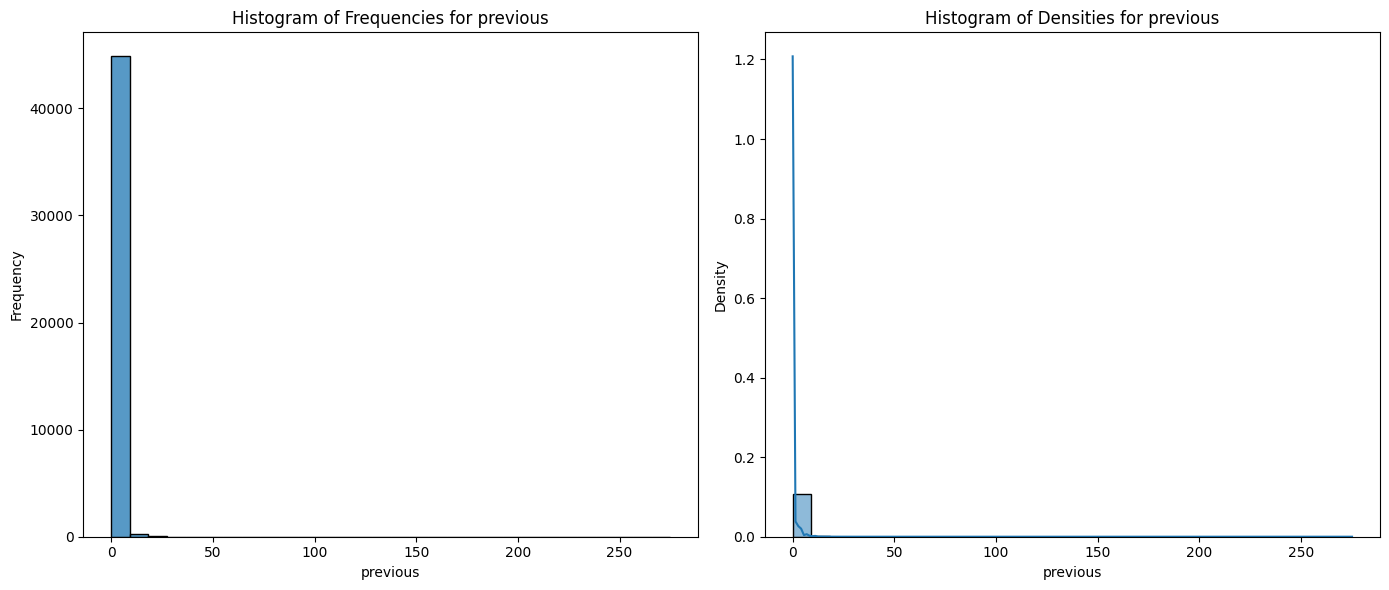

In [107]:
# Call the function to plot the graph for all variables
plot_all_numerical_histograms(dataset)



Box Plot

In [108]:
def statistics_nvar(data, numerical_cols):
    fig, axs = plt.subplots(1, len(numerical_cols), figsize = (16, 4))
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

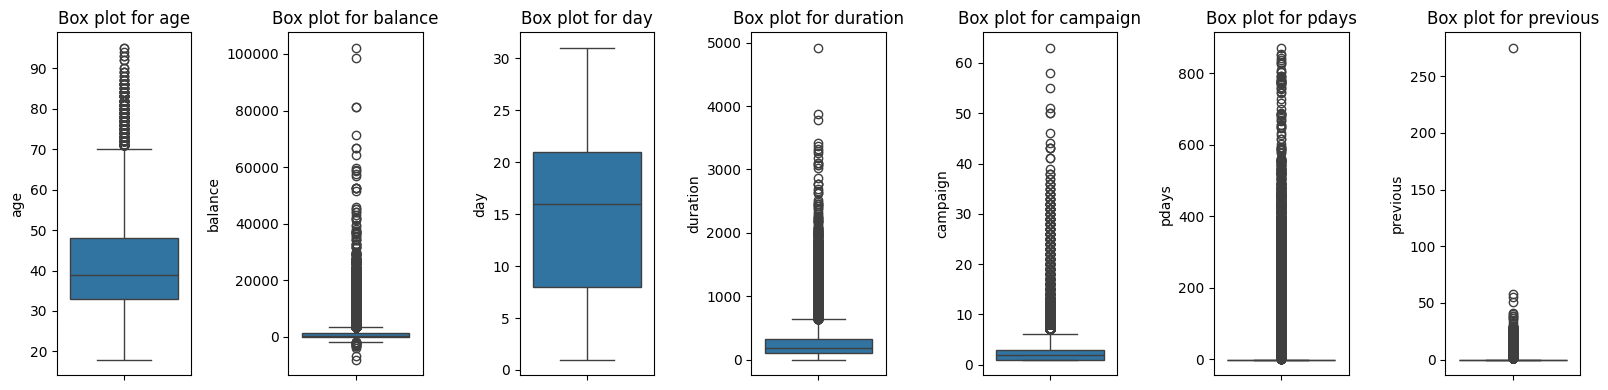

In [109]:
# boxplot for each numerical column
statistics_nvar(dataset, numerical_cols)

Statistical metrics

In [110]:
# statistical information about numerical variables
dataset[numerical_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Correlation Analysis

The correlation between 2 variables quantify the linear relationship between the variables X and Y:  
$$ r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} $$   
Where:  
  
$r$: pearson correlation coefficient  
$Cov(x, y)$: covariance between variables X and Y. It measures how much the two variables change together.  
$\sigma_X, \sigma_Y$: standard deviations for variables X and Y.  

Formula of Covariance:  
$$ \text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y}) $$  
Formula for standard deviation for X:  
$$ \sigma_X = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2} $$  
Formula for standard deviation for Y:  
$$ \sigma_Y = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (Y_i - \bar{Y})^2} $$  

In [117]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()    
    plt.show()

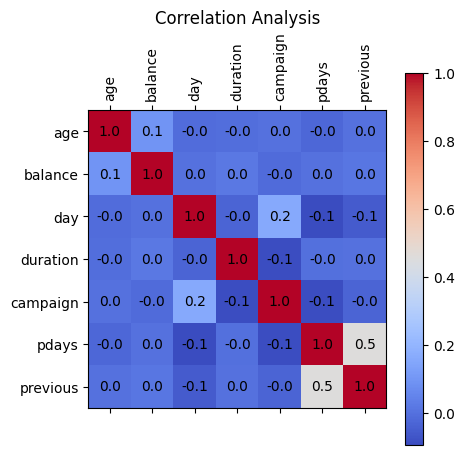

In [118]:
plot_correlation(dataset, numerical_cols)

Implications of Low Correlation

- **Independence of Features**:  
Low correlation suggests that the features are likely independent of each other. 
This can be beneficial because independent features provide unique information to the model, which can improve its performance.
- **Feature Redundancy**:   
When features are not correlated, it reduces the risk of redundancy. 
Including redundant features (highly correlated) can lead to issues like multicollinearity, making it difficult to interpret the model and possibly degrading its performance.
- **Model Complexity**:  
Low correlation may indicate that the model needs to learn more complex relationships to make accurate predictions. 
If features do not provide overlapping information, the model may require more sophisticated techniques (like polynomial regression or interaction terms) to capture the underlying patterns.
- **Feature Selection**:  
In some cases, low-correlation features might be candidates for removal if they do not contribute significantly to the predictive power of the model. 

**Outliers detection using Z-Score**  
The Z-score is the number of standard deviations from the mean that a data point is.  
The formula for the Z-score is:  
$$ Z = \frac{x - \mu}{\sigma} $$


In [119]:
# function to plot gaussian kernel
def plot_gaussian_kernel(mean=0, std_dev=1, num_points=1000):    
    # Generate x values
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, num_points)
    
    # Calculate the Gaussian kernel values
    gaussian_kernel = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, gaussian_kernel, color='blue', label=f'Gaussian Kernel\nMean = {mean}, Std Dev = {std_dev}')
    plt.title('Gaussian Kernel')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.legend()
    plt.grid()
    plt.show()

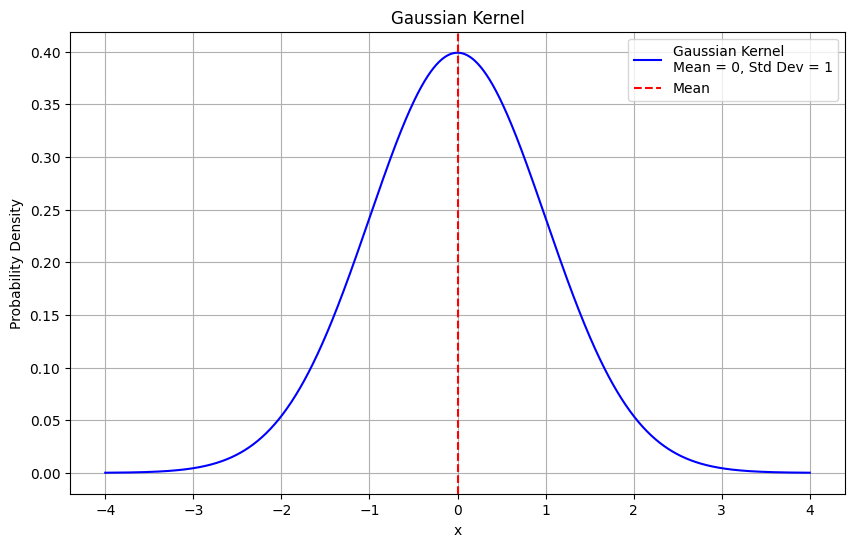

In [120]:
# standard gaussian kernel
plot_gaussian_kernel(mean=0, std_dev=1)

In [121]:
from scipy.stats import norm

# Calculate the percentile for a specific Z-score
def call_percentile(z):
    percentile = float(round(norm.cdf(z) * 100, 3))
    return percentile

In [122]:
call_percentile(z = -2)

2.275

In [123]:
from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)
    
    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    
    return outliers

In [124]:
outliers_detection(dataset, "age").head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
54,24,technician,single,secondary,no,-103,yes,yes,unknown,5,may,145,1,-1,0,unknown,no
135,23,blue-collar,married,secondary,no,94,yes,no,unknown,5,may,193,1,-1,0,unknown,no
246,22,blue-collar,single,secondary,no,0,yes,no,unknown,5,may,179,2,-1,0,unknown,no
292,24,student,single,secondary,no,423,yes,no,unknown,5,may,226,3,-1,0,unknown,no
297,24,student,single,secondary,no,82,yes,no,unknown,5,may,204,2,-1,0,unknown,no


In [125]:
# cycle to check the number of outliers in each numerical column
for col in numerical_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in age ***
#samples outlier to distribution = 1770
%outliers = 3.91 %

*** Outliers detection in balance ***
#samples outlier to distribution = 2058
%outliers = 4.55 %

*** Outliers detection in day ***
#samples outlier to distribution = 965
%outliers = 2.13 %

*** Outliers detection in duration ***
#samples outlier to distribution = 2048
%outliers = 4.53 %

*** Outliers detection in campaign ***
#samples outlier to distribution = 995
%outliers = 2.2 %

*** Outliers detection in pdays ***
#samples outlier to distribution = 997
%outliers = 2.21 %

*** Outliers detection in previous ***
#samples outlier to distribution = 787
%outliers = 1.74 %


* Categorical Variables

In [116]:
# list of categorical variables
categorical_vars = list(set(dataset.columns) - set(numerical_cols))
categorical_vars

['job',
 'marital',
 'loan',
 'poutcome',
 'default',
 'housing',
 'contact',
 'month',
 'y',
 'education']

Count instances for each categorical column

In [126]:
# cycle to calculate number of instances in each categorical column
for col in categorical_vars:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** job ******
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

***** marital ******
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

***** loan ******
loan
no     37967
yes     7244
Name: count, dtype: int64

***** poutcome ******
poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

***** default ******
default
no     44396
yes      815
Name: count, dtype: int64

***** housing ******
housing
yes    25130
no     20081
Name: count, dtype: int64

***** contact ******
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

***** month ******
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     

Bar chart - Analysis of absolute frequencies

In [127]:
# function to plot bar chart for absolute frequencies in 1 categorical column
def plot_barchart(dataset, col):
    results = dataset[col].value_counts()
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    plt.title("Statistical analysis by " + col)
    plt.show()

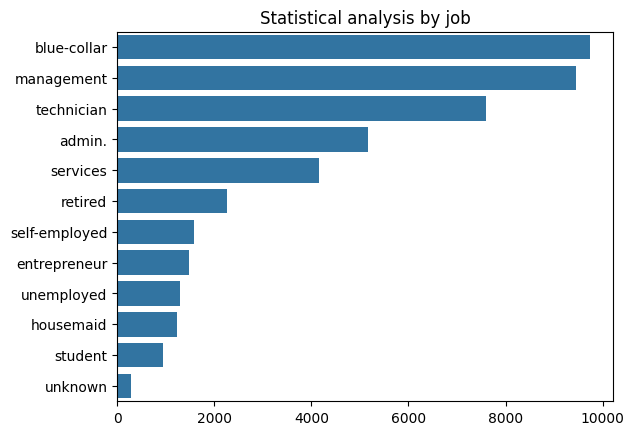

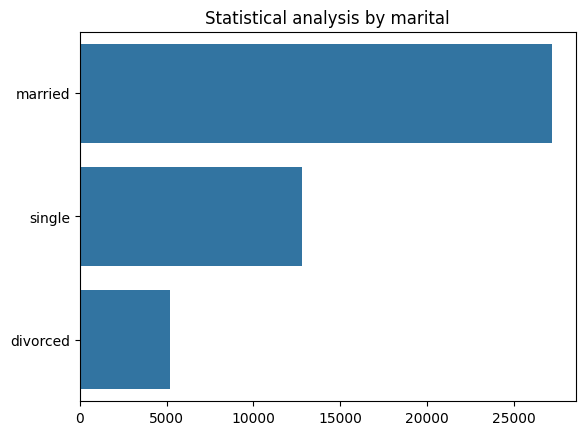

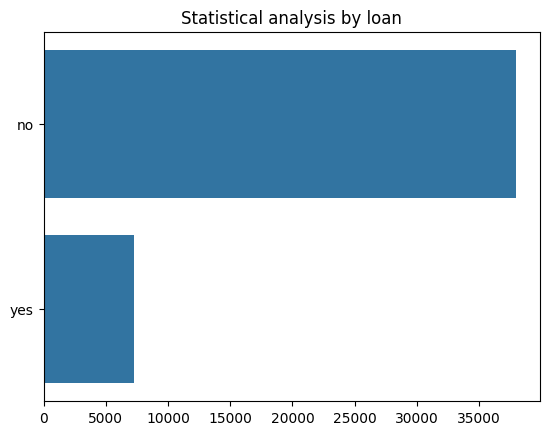

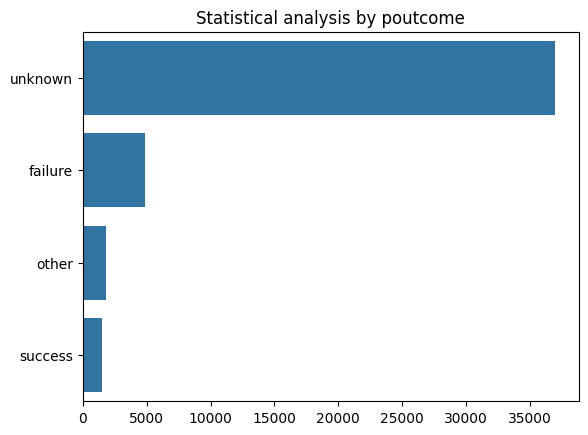

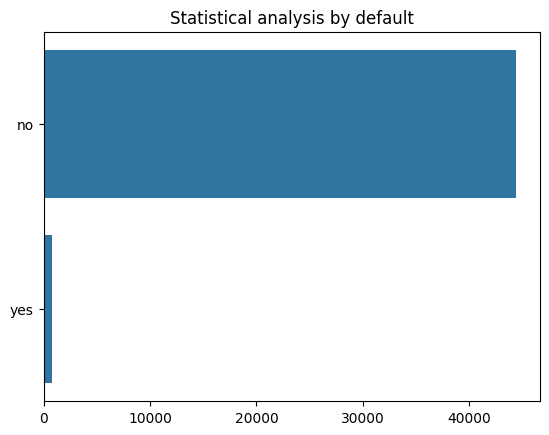

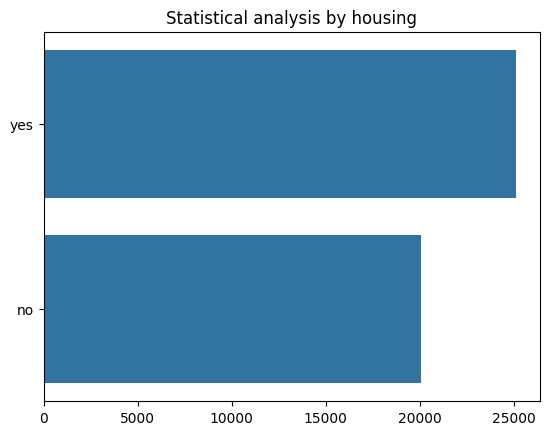

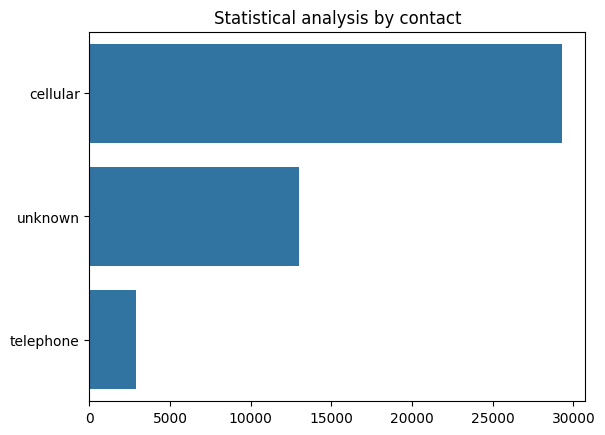

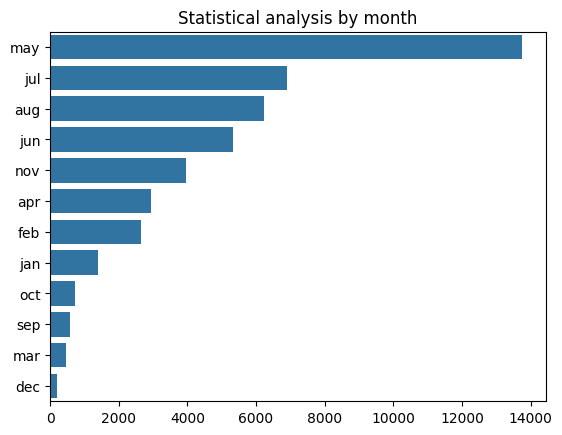

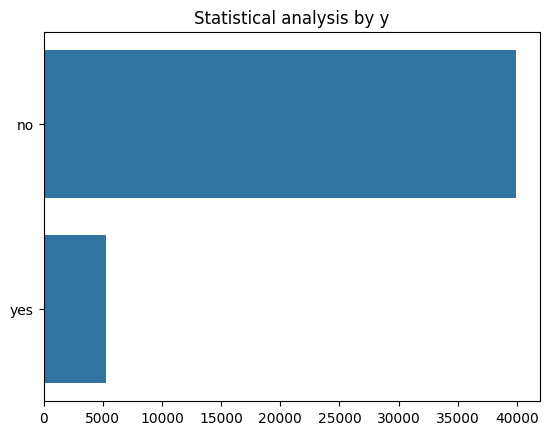

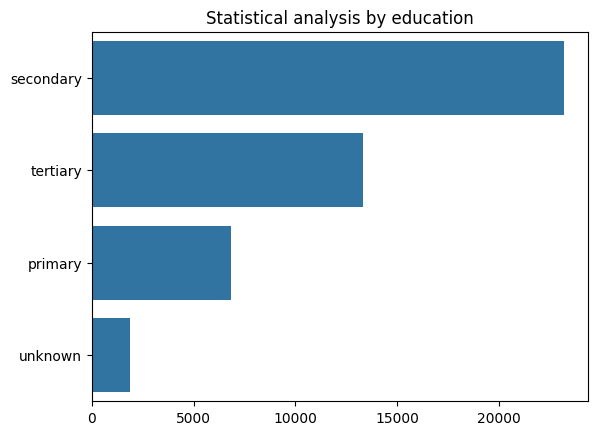

In [128]:
# cycle to plot bar chart for each categorical column
for col in categorical_vars:
    plot_barchart(dataset, col)

Pie Chart - Analysis of relative frequencies

In [129]:
# function to plot pie chart for relative frequencies in 1 categorical column
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

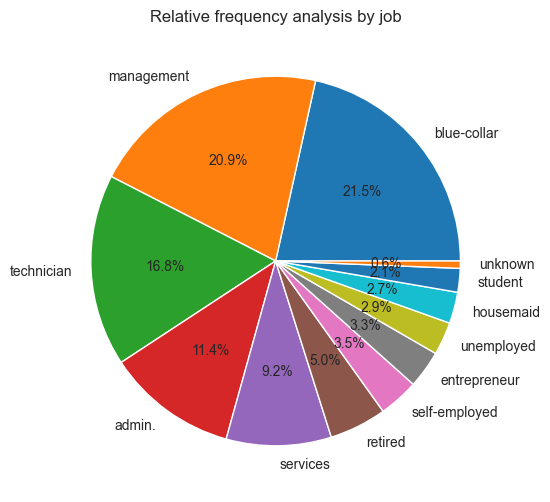

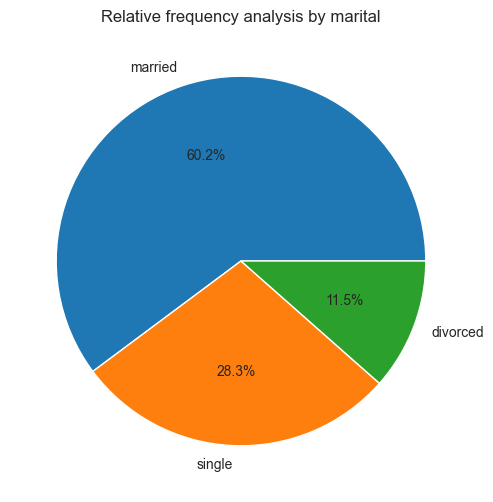

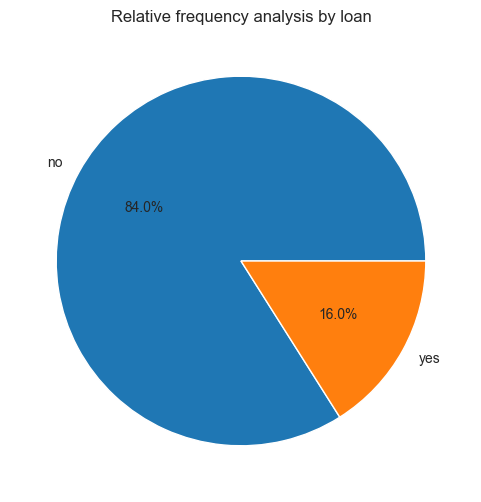

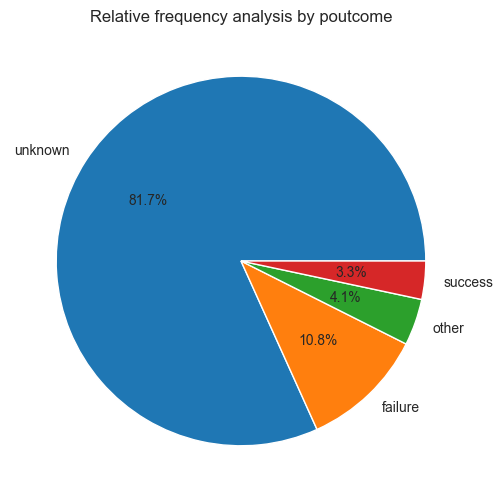

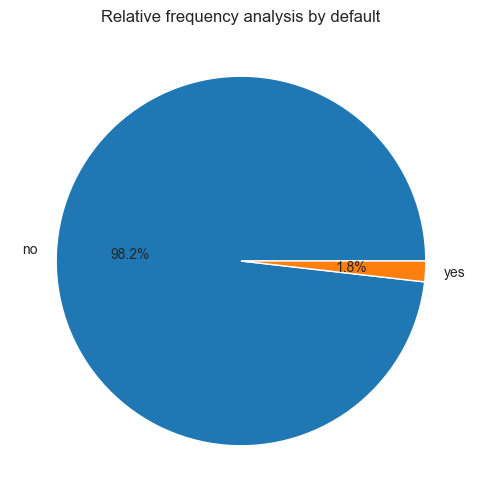

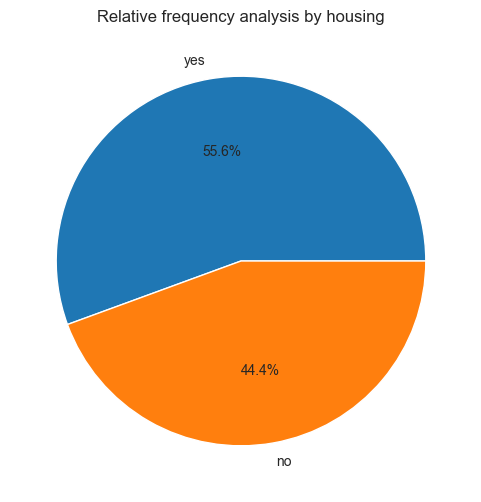

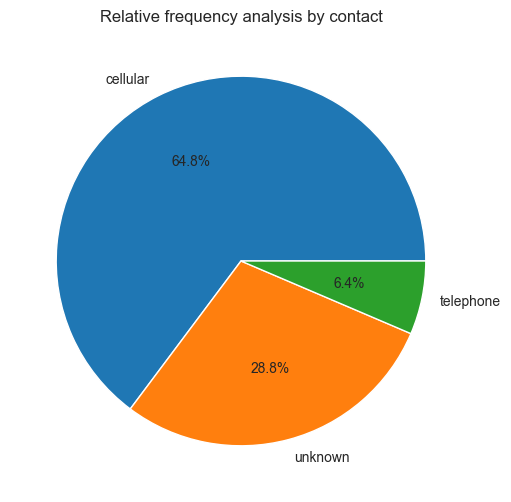

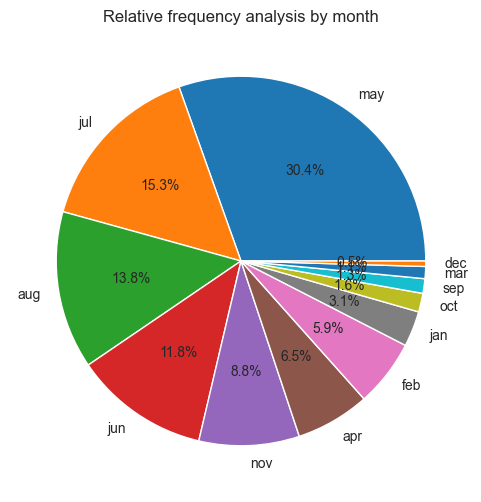

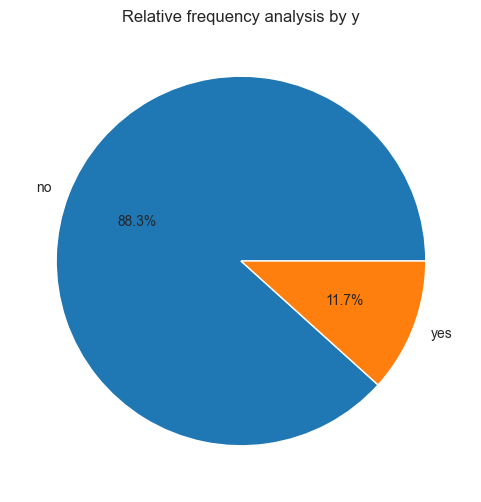

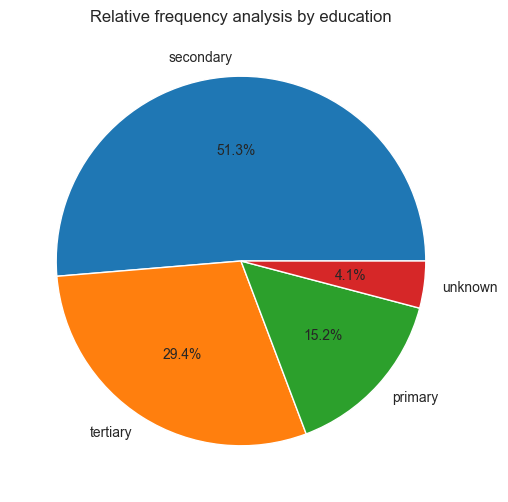

In [130]:
# cycle to plot pie chart for each categorical column
for col in categorical_vars:
    plot_piechart(dataset, col)

Statistical Analysis for subgroups 

In [156]:
# create groups organized by sex and income
group_sex_income = dataset.groupby(["marital", "y"]).size().reset_index(name = "samples")
print(group_sex_income)

    marital    y  samples
0  divorced   no     4585
1  divorced  yes      622
2   married   no    24459
3   married  yes     2755
4    single   no    10878
5    single  yes     1912


In [157]:
# function to plot absolute frequencies for groups
def plot_absfreq_groups(group, g1, g2):
    plt.figure(figsize=(15, 6))
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel('marital')
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies by marital and y')
    plt.tight_layout()
    plt.show()

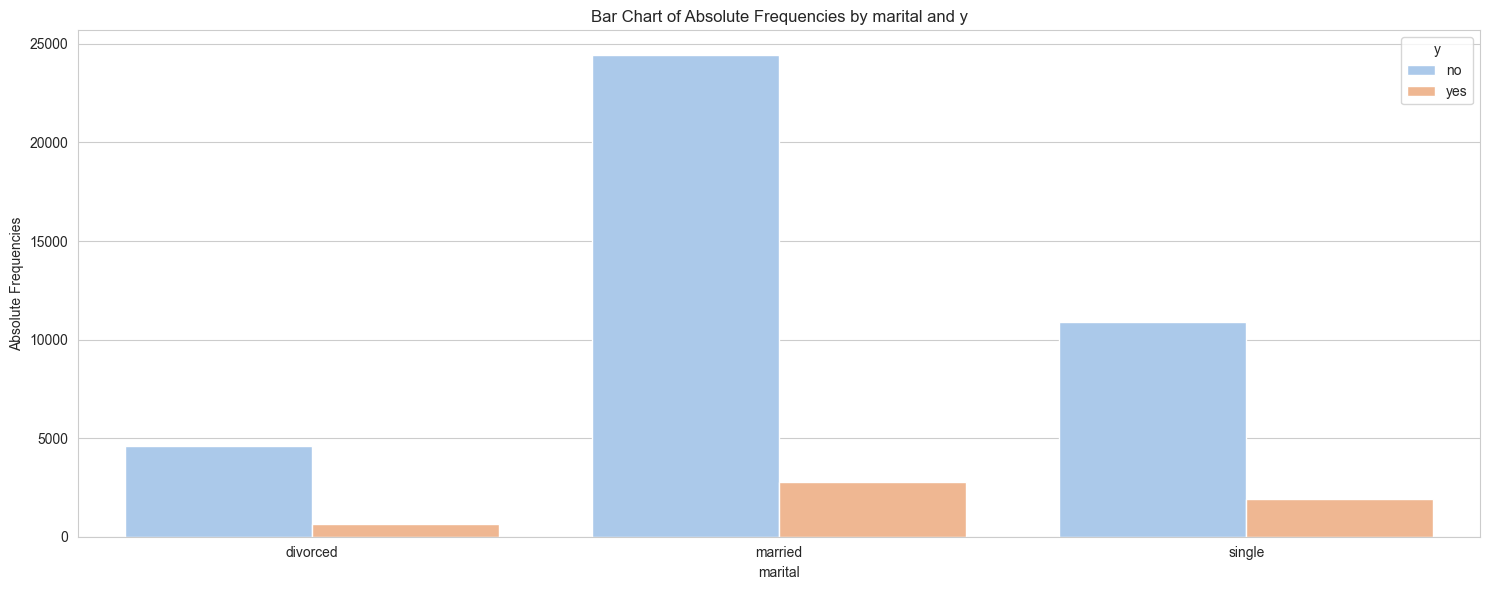

In [158]:
plot_absfreq_groups(group_sex_income, "marital", "y")

In [161]:
# function to plot relative frequencies for groups
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + " with salary " + group[g2]
    sizes = group["samples"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies by marital and y')
    plt.show()

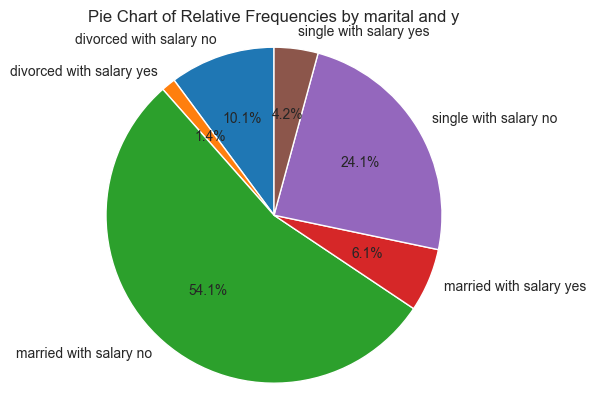

In [162]:
plot_relfreq_groups(group_sex_income, "marital", "y")